In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'Chile'
raceDate = '29/9-1/10/2023'
surface = 'Gravel'
competition = 'Wrc'

link = 'https://www.ewrc-results.com/results/80242-rally-chile-biobio-2023/?s='
startat, no_ss=428339, int(12)

canceled = []


stages = [number for number in range(no_ss)]

rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [2]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    
    my_url11 = link + ss_a
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [3]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:3]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#8,Tänak Ott - J,RC1,10:16.8,-,115.4,1,Chile,29/9-1/10/2023,Gravel,Wrc,1
1,2,#3,Suninen Teemu,RC1,10:18.9,+2.1 + 2.1,115.0 0.11,1,Chile,29/9-1/10/2023,Gravel,Wrc,2
2,3,#33,Evans Elfyn -,RC1,10:21.7,+4.9 + 2.8,114.5 0.25,1,Chile,29/9-1/10/2023,Gravel,Wrc,3
3,4,#7,Loubet Pierre-,RC1,10:24.2,+7.4 + 2.5,114.0 0.37,1,Chile,29/9-1/10/2023,Gravel,Wrc,4
4,5,#69,Rovanperä Kall,RC1,10:26.8,+10.0 + 2.6,113.5 0.51,1,Chile,29/9-1/10/2023,Gravel,Wrc,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,38,#40,Kovacs Eduardo,RC2,27:53.2 [N],+10:32.7 + 0.0,61.8 22.0,12,Chile,29/9-1/10/2023,Gravel,Wrc,41
41,42,#50,Gardiol Ignaci,RC4,30:09.6 [N],+12:49.1 + 2:16.4,57.1 26.8,12,Chile,29/9-1/10/2023,Gravel,Wrc,42
42,42,#53,Padilla Felipe,RC4,30:09.6 [N],+12:49.1 + 0.0,57.1 26.8,12,Chile,29/9-1/10/2023,Gravel,Wrc,43
43,42,#54,Palma Lucas -,RC4,30:09.6 [N],+12:49.1 + 0.0,57.1 26.8,12,Chile,29/9-1/10/2023,Gravel,Wrc,44


In [5]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [7]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.png'))


In [8]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Tänak Ott - J,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,1,616.8
1,Suninen Teemu,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,2,618.9
2,Evans Elfyn -,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,3,621.7
3,Loubet Pierre-,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,4,624.2
4,Rovanperä Kall,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,5,626.8
...,...,...,...,...,...,...,...,...,...
40,Kovacs Eduardo,RC2,12,Chile,29/9-1/10/2023,Gravel,Wrc,41,NaN
41,Gardiol Ignaci,RC4,12,Chile,29/9-1/10/2023,Gravel,Wrc,42,NaN
42,Padilla Felipe,RC4,12,Chile,29/9-1/10/2023,Gravel,Wrc,43,NaN
43,Palma Lucas -,RC4,12,Chile,29/9-1/10/2023,Gravel,Wrc,44,NaN


In [9]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race  ss Gr/Cl             
Chile 1  RC1          616.8
         RC2          643.3
         RC3          709.4
         RC4          721.3
         RC5          932.8
      2  RC1          412.9
         RC2          430.1
         RC3          475.2
         RC4          481.2
         RC5            NaN
      3  RC1          752.0
         RC2          774.9
         RC3          863.5
         RC4          876.7
         RC5         1059.9
      4  RC1          598.7
         RC2          623.9
         RC3          692.9
         RC4          724.5
         RC5          855.5
      5  RC1          399.8
         RC2          417.6
         RC3          479.8
         RC4          473.0
         RC5          581.5
      6  RC1          732.2
         RC2          760.9
         RC3            NaN
         RC4            NaN
         RC5            NaN
      7  RC1         1040.7
         RC2         1088.0
         RC3         1167.1
         RC4         1199.5
         RC5         1419.8
      8  RC1          839.0
         RC2          869.8
         RC3          930.6
         RC4          959.1
         RC5         1106.9
      9  RC1         1060.9
         RC2         1102.5
         RC3         1205.2
         RC4         1199.9
         RC5         1378.5
      10 RC1         1027.5
         RC2         1065.2
         RC3         1143.6
         RC4         1178.8
         RC5         1367.6
      11 RC1          827.8
         RC2          858.1
         RC3          947.8
         RC4          969.7
         RC5         1086.7
      12 RC1         1040.5
         RC2         1073.2
         RC3         1173.1
         RC4         1209.6
         RC5         1375.7

In [10]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Tänak Ott - J,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,1,616.8,616.8,616.8,0.0,0.0,0.000000,01
1,Suninen Teemu,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,2,618.9,616.8,616.8,2.1,2.1,0.340467,01
2,Evans Elfyn -,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,3,621.7,616.8,616.8,4.9,4.9,0.794423,01
3,Loubet Pierre-,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,4,624.2,616.8,616.8,7.4,7.4,1.199741,01
4,Rovanperä Kall,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,5,626.8,616.8,616.8,10.0,10.0,1.621271,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,Padilla Felipe,RC4,12,Chile,29/9-1/10/2023,Gravel,Wrc,43,NaN,1209.6,1040.5,NaN,NaN,NaN,12
556,Palma Lucas -,RC4,12,Chile,29/9-1/10/2023,Gravel,Wrc,44,NaN,1209.6,1040.5,NaN,NaN,NaN,12
557,Fuertes Iván,RC4,12,Chile,29/9-1/10/2023,Gravel,Wrc,45,NaN,1209.6,1040.5,NaN,NaN,NaN,12
558,Arce Lazo J.,RC5,12,Chile,29/9-1/10/2023,Gravel,Wrc,33,1375.7,1375.7,1040.5,335.2,0.0,0.000000,12


In [24]:
Group = 'RC2'
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_WRC.to_csv(str(rallyname) + str(Group) + '.csv')
ss_times_WRC

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
9,Solberg Oliver,RC2,1,Chile,29/9-1/10/2023,Gravel,Wrc,8,643.3,643.3,616.8,26.5,0.0,0.000000,01
10,Pajari Sami -,RC2,1,Chile,29/9-1/10/2023,Gravel,Wrc,9,643.4,643.3,616.8,26.6,0.1,0.015545,01
11,Gryazin Nikola,RC2,1,Chile,29/9-1/10/2023,Gravel,Wrc,10,648.1,643.3,616.8,31.3,4.8,0.746153,01
12,Greensmith Gus,RC2,1,Chile,29/9-1/10/2023,Gravel,Wrc,13,654.9,643.3,616.8,38.1,11.6,1.803202,01
13,Martínez Fonte,RC2,1,Chile,29/9-1/10/2023,Gravel,Wrc,14,657.5,643.3,616.8,40.7,14.2,2.207368,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Zaldivar F. -,RC2,12,Chile,29/9-1/10/2023,Gravel,Wrc,29,1300.6,1073.2,1040.5,260.1,227.4,21.188968,12
537,Fernández Emil,RC2,12,Chile,29/9-1/10/2023,Gravel,Wrc,38,NaN,1073.2,1040.5,NaN,NaN,NaN,12
538,Bulacia Bruno,RC2,12,Chile,29/9-1/10/2023,Gravel,Wrc,39,NaN,1073.2,1040.5,NaN,NaN,NaN,12
539,Israel Benjami,RC2,12,Chile,29/9-1/10/2023,Gravel,Wrc,40,NaN,1073.2,1040.5,NaN,NaN,NaN,12


In [25]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

SS.,01,02,03,04,05,06,07,08,09,10,11,12
Crew,,,,,,,,,,,,
Bulacia Bruno,34.4,17.1,71.6,31.9,20.6,21.5,20.8,55.1,90.4,10.9,30.1,NaN
Bulacia Marco,17.0,6.1,24.6,12.0,66.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fernández Emil,29.1,18.3,44.4,32.7,23.5,45.5,28.5,38.7,25.6,47.6,36.2,NaN
Greensmith Gus,11.6,4.3,12.0,9.9,9.7,11.6,14.1,2.1,1.7,0.0,12.5,17.2
Gryazin Nikola,4.8,5.3,8.1,3.1,11.7,21.0,19.5,10.3,0.0,6.7,42.9,37.7
Heller Pedro,29.8,13.5,43.3,35.5,22.0,51.4,38.6,34.1,30.8,30.0,40.9,55.7
Israel Benjami,32.8,15.4,57.5,33.3,22.5,34.9,40.3,NaN,NaN,NaN,NaN,NaN
Kajetanowicz K,20.5,9.3,17.6,16.6,7.2,9.8,16.7,11.1,8.1,10.5,12.6,19.4
Kovacs Eduardo,109.2,84.9,128.8,113.1,85.1,NaN,142.6,NaN,NaN,NaN,NaN,NaN


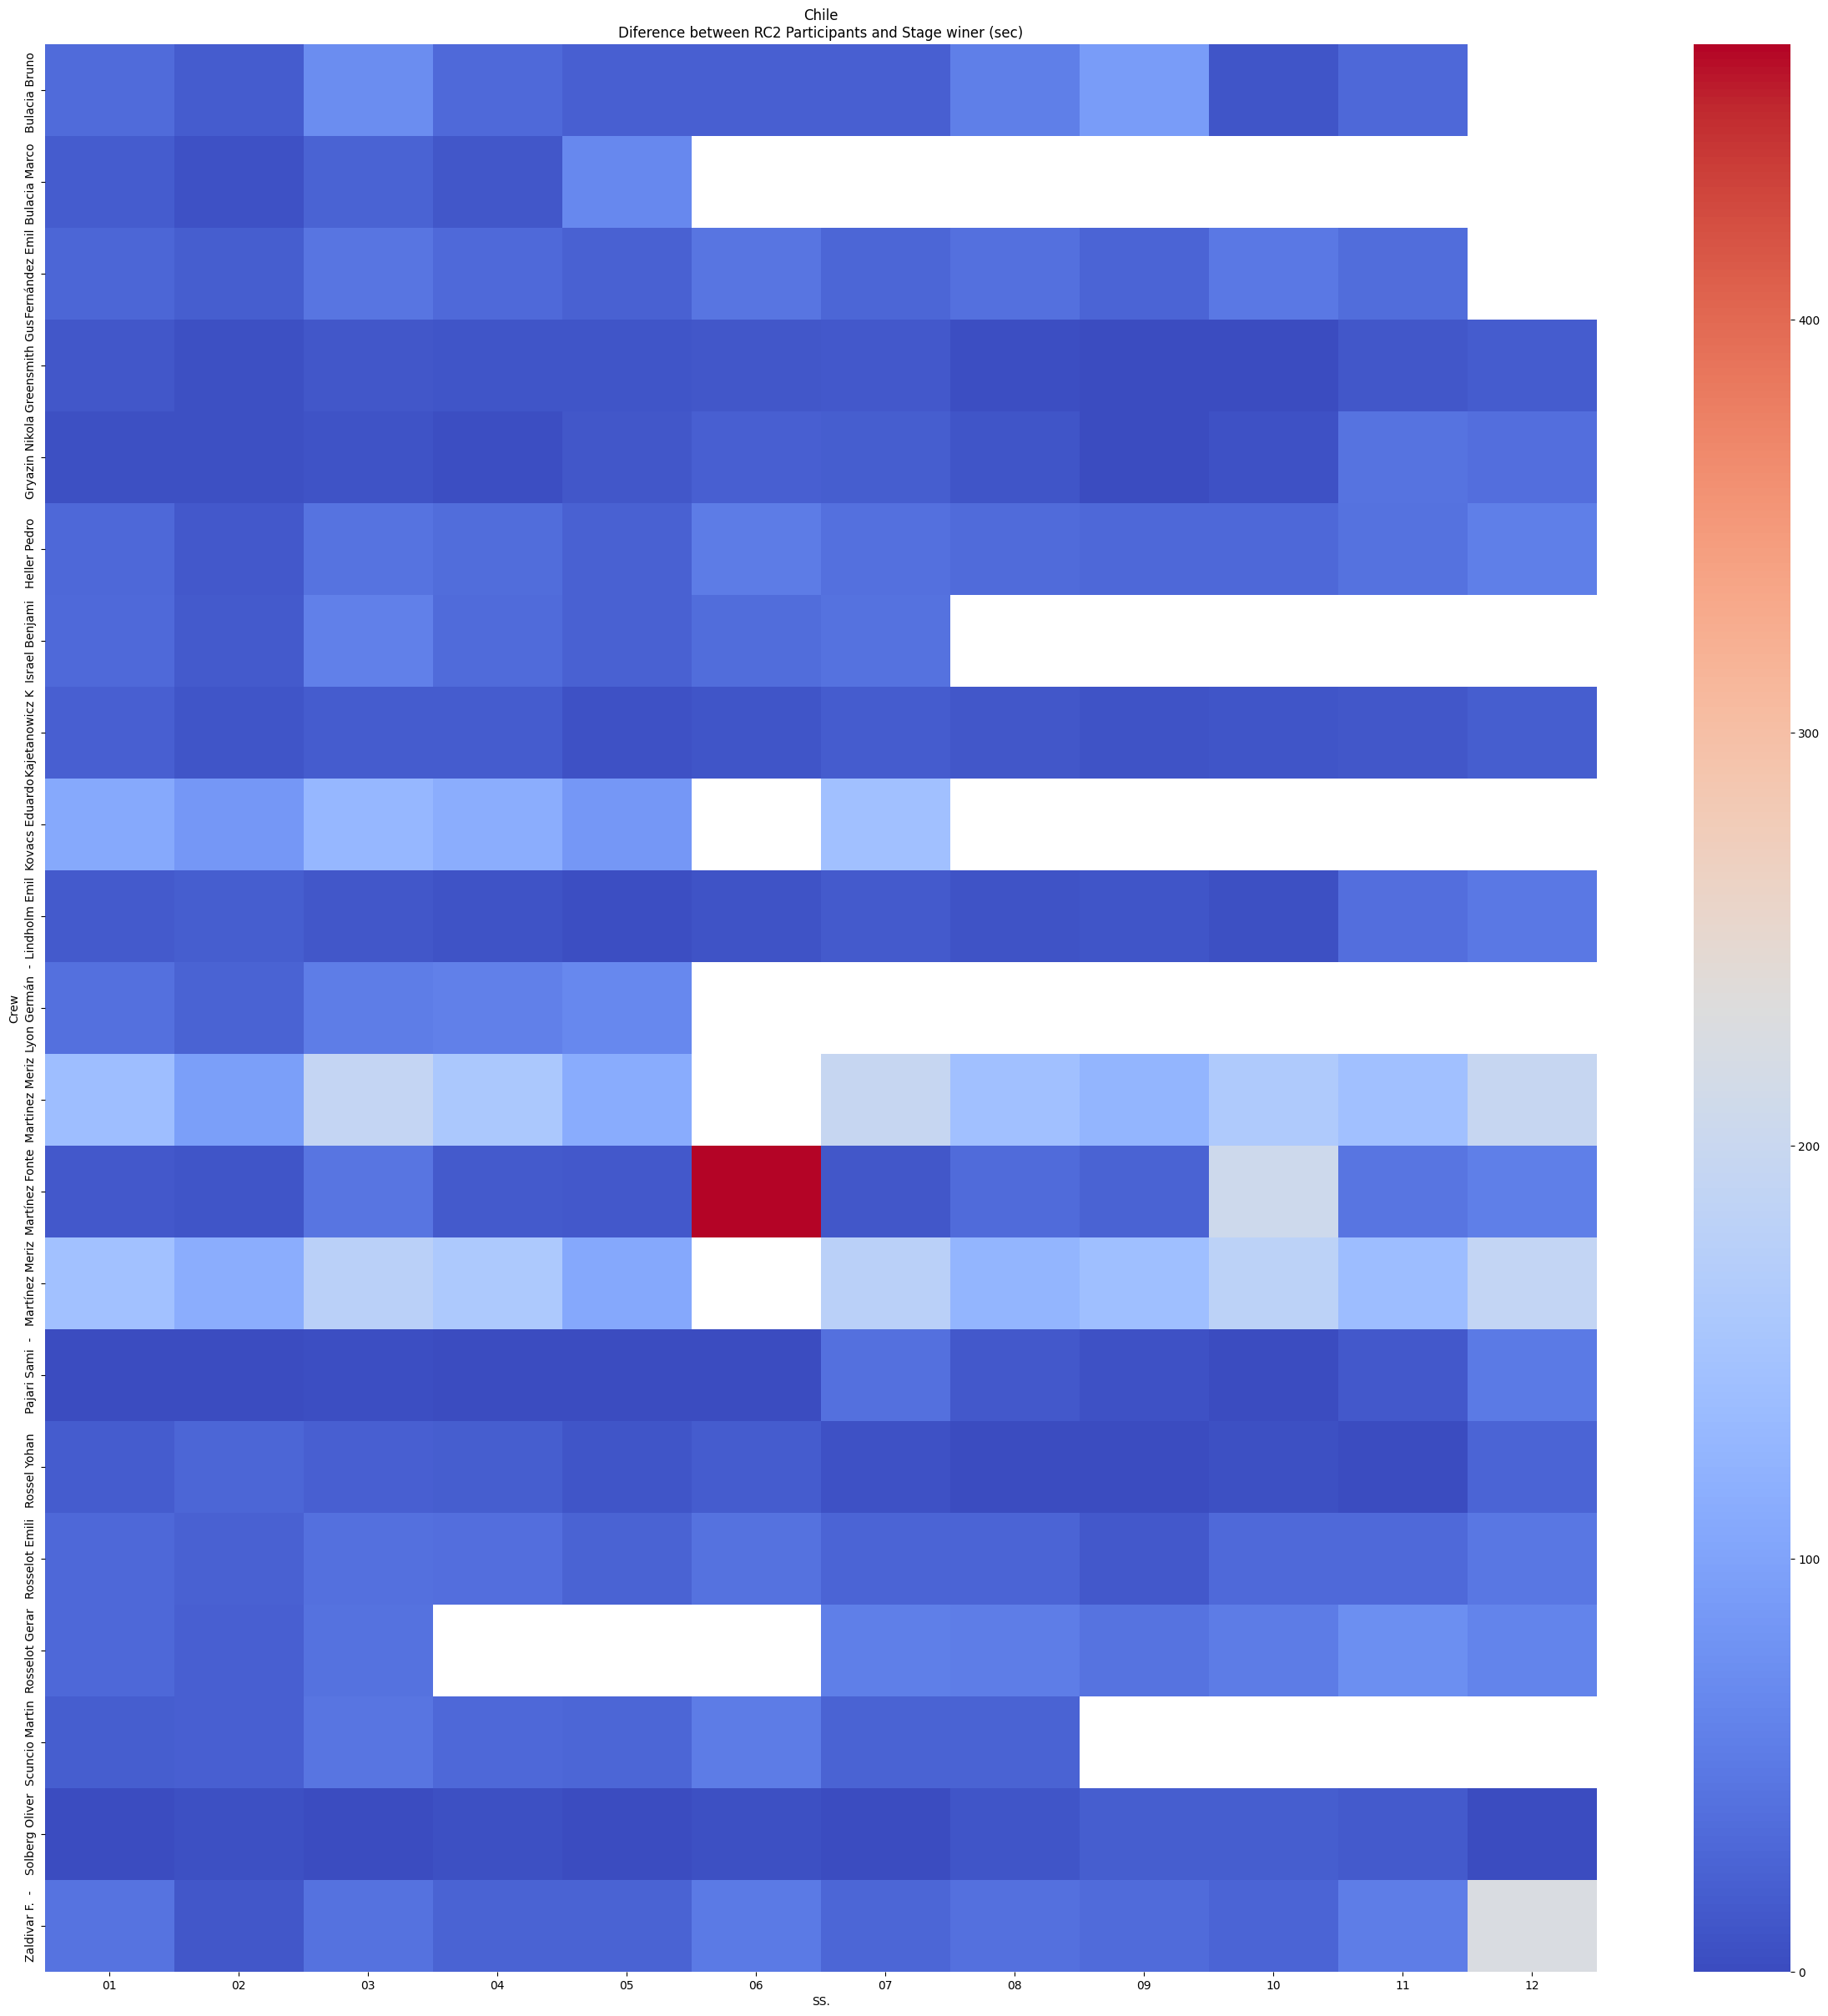

In [26]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
#plt.savefig("Heatmap_" + Group + ".png")
plt.show()

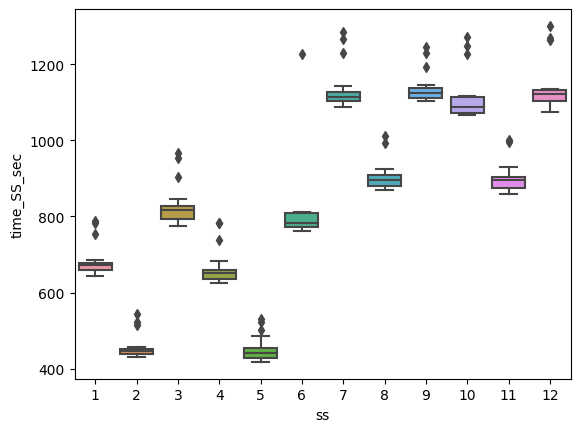

In [27]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
#plt.savefig("Boxplot_" + Group + ".png")

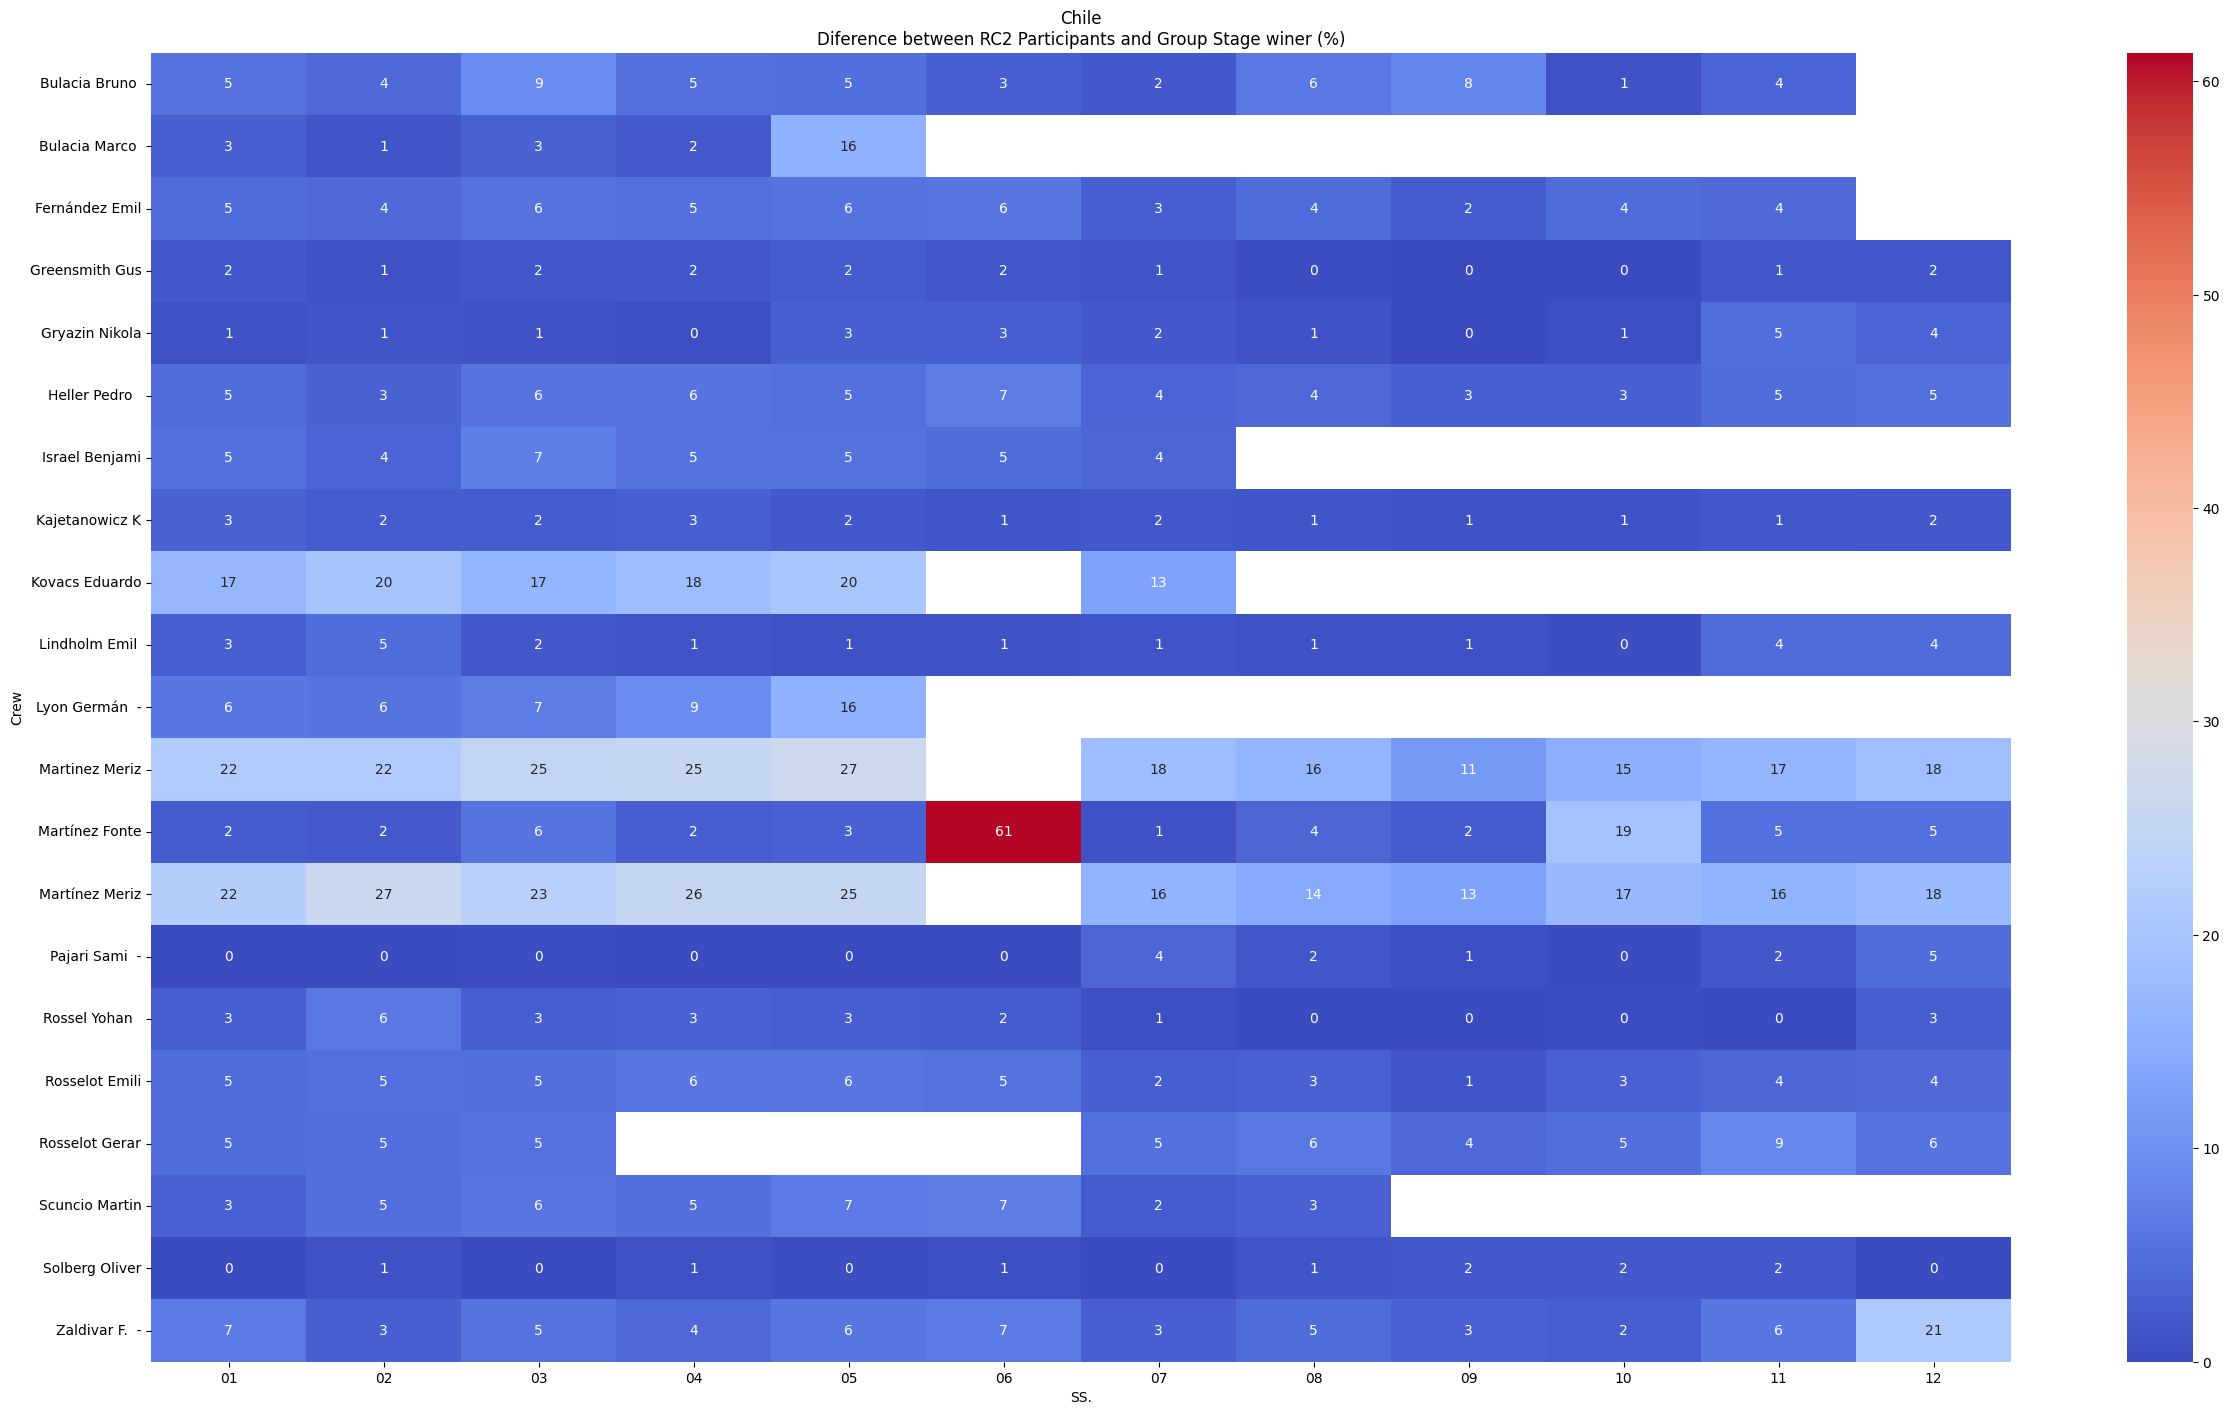

In [28]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(30,17)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Group Stage winer (%)')
#plt.savefig(rallyname + Group + ".jpg")
plt.show()